In [1]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git


  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-r77p0f_y
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-r77p0f_y
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit c5907ef52e51d471d6c5b926c16841d17f425652
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for chronos-forecasting: filename=chronos_forecasting-2.1.0-py3-none-any.whl size=71772 sha256=9756c5d489b65b213e161ae467e8d1ad8e04ec52cc0dafd30b5ad8298587a0e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-rkt5tqv9/wheels/b9/a6/b5/75fca7306751a3bc92a63680f861f44a42a8776f6423cf0188
Successfully built chronos-forecasting


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

In [4]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-small",
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [5]:
## Data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

start_date = datetime.now()
num_days = 10

dates = [start_date - timedelta(days=i) for i in range(num_days)]

sales = [100 + i*10 + np.random.normal(0, 10) for i in range(num_days)]

data = pd.DataFrame({'date': dates, 'sales': sales})

data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d %H:%M:%S')


data.to_csv('sales_data.csv', index=False)

print(data.head())



                  date       sales
0  2025-11-27 10:22:14  118.521799
1  2025-11-26 10:22:14  110.870028
2  2025-11-25 10:22:14  117.263564
3  2025-11-24 10:22:14  141.386241
4  2025-11-23 10:22:14  150.010557


In [6]:
df = pd.read_csv("/content/sales_data.csv")

In [7]:
context = torch.tensor(df["sales"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)

In [8]:
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

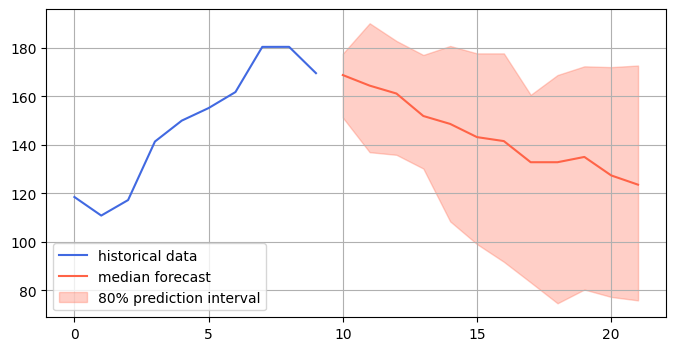

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(df["sales"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()